Una vez teniendo limpio el dataset original, y preparado para el tratamiento respectivo de ML, se procederá a aplicar algunas técnicas del mismo para exploración del mismo.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
da = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Selection process/Atifraudfinal.csv")
da.head()

,Unnamed: 0,Order Id,Creation date,mes,Account Id,Response code,Payment method,Country BIN ISO,Valor,Processing value,Franchise,Transaction type_AUTHORIZATION_AND_CAPTURE,Transaction type_REFUND,Transaction type_VOID,Status_APPROVED,Payment model_GATEWAY,Transaction origin_POST_API,Accreditation model_IMMEDIATE,Card type_CREDIT,Card type_DEBIT
0,0,521715135,2020-08-31 12:41:45.866,8,833883,0.0,0.0,0.0,34450,34450.0,0.0,1,0,0,1,1,1,1,1,0
1,1,521714842,2020-08-31 12:41:23.219,8,833883,1.0,1.0,0.0,45850,45850.0,0.0,1,0,0,0,1,1,1,1,0
2,2,521714218,2020-08-31 12:41:00.150,8,833883,2.0,0.0,0.0,50876,50876.0,0.0,1,0,0,0,1,1,1,1,0
3,3,521713519,2020-08-31 12:40:19.128,8,839429,0.0,2.0,0.0,500,500.0,1.0,0,1,0,1,1,1,1,0,1
4,4,521713519,2020-08-31 12:40:16.871,8,839429,0.0,2.0,0.0,500,500.0,1.0,1,0,0,1,1,1,1,0,1


In [3]:
#Debido a la importación sobre un nuevo doc, el csv genera una columna innecesaria que se tendrá que eliminar
daf = da.drop(["Unnamed: 0"], axis =1)
daf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570015 entries, 0 to 570014
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   Order Id                                    570015 non-null  int64         
 1   Creation date                               570015 non-null  datetime64[ns]
 2   mes                                         570015 non-null  int64         
 3   Account Id                                  570015 non-null  int64         
 4   Response code                               570015 non-null  int32         
 5   Payment method                              570015 non-null  int32         
 6   Country BIN ISO                             570015 non-null  int32         
 7   Valor                                       570015 non-null  int64         
 8   Processing value                            570015 non-null  int32        

Si bien la variable creation se mantiene en este modelo, realmente no se comprende gran utilidad en análisis más allá del Timeseries, pues este realmente es el único caso donde la fecha cobra importancia, por ello se harán un par de tratamientos con ella antes de ser eliminado del modelo como tal

In [4]:
series1 = daf[["Creation date", "Status_APPROVED"]]
series2 = daf[["Creation date", "Valor"]]

In [5]:
series2.describe()

,Valor
count,5.700150e+05
mean,8.804402e+04
std,1.647088e+05
min,1.000000e+02
25%,2.445000e+04
50%,6.000000e+04
75%,1.074600e+05
max,3.804520e+07


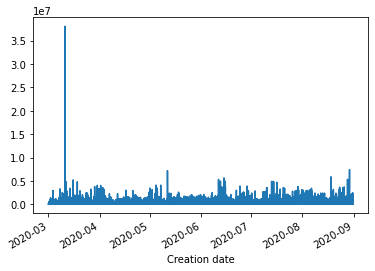

In [6]:
ss2 = series2.copy()
ss2.index = ss2["Creation date"]
ss2["Valor"].plot()

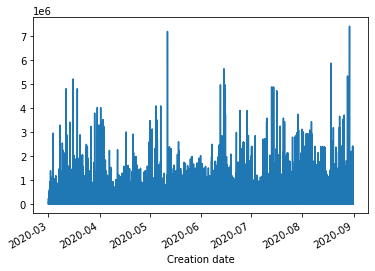

In [7]:
series3 = daf[["Creation date", "Processing value"]]
ss3 = series3.copy()
ss3.index = ss3["Creation date"]
ss3["Processing value"].plot()

In [8]:
series3.describe()

,Processing value
count,5.700150e+05
mean,8.708963e+04
std,1.466823e+05
min,0.000000e+00
25%,2.335000e+04
50%,5.937000e+04
75%,1.068000e+05
max,7.412600e+06


In [9]:
import seaborn as sns

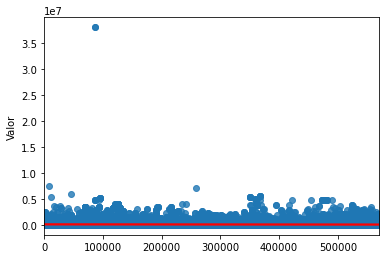

In [10]:
sns.regplot(x=series2.index.values, y= series2["Valor"], line_kws={"color": "red"})

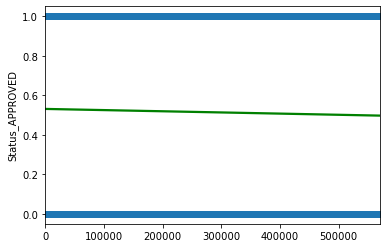

In [11]:
sns.regplot(x=series1.index.values, y= series1["Status_APPROVED"], line_kws={"color": "green"})

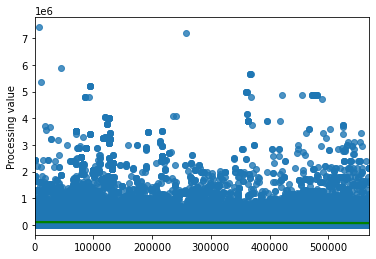

In [12]:
sns.regplot(x=series3.index.values, y= series3["Processing value"], line_kws={"color": "green"})

In [14]:
daf.describe()

,Order Id,mes,Account Id,Response code,Payment method,Country BIN ISO,Valor,Processing value,Franchise,Transaction type_AUTHORIZATION_AND_CAPTURE,Transaction type_REFUND,Transaction type_VOID,Status_APPROVED,Payment model_GATEWAY,Transaction origin_POST_API,Accreditation model_IMMEDIATE,Card type_CREDIT,Card type_DEBIT
count,5.700150e+05,570015.000000,570015.000000,570015.00000,570015.000000,570015.000000,5.700150e+05,5.700150e+05,570015.000000,570015.000000,570015.000000,570015.000000,570015.000000,570015.000000,570015.000000,570015.000000,570015.000000,570015.000000
mean,4.636128e+08,5.809119,835571.482493,1.38379,1.458556,1.091380,8.804402e+04,8.708963e+04,0.675998,0.934396,0.065509,0.000095,0.514237,0.999940,0.998528,0.992444,0.699932,0.285322
std,7.238935e+07,1.585588,2565.218383,1.97590,1.194717,4.123746,1.647088e+05,1.466823e+05,0.575412,0.247588,0.247422,0.009733,0.499798,0.007723,0.038337,0.086596,0.458287,0.451568
min,3.811133e+08,3.000000,795309.000000,0.00000,0.000000,0.000000,1.000000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.241135e+08,5.000000,833883.000000,0.00000,0.000000,0.000000,2.445000e+04,2.335000e+04,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,4.575717e+08,6.000000,833883.000000,0.00000,2.000000,0.000000,6.000000e+04,5.937000e+04,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,4.885732e+08,7.000000,839429.000000,2.00000,2.000000,1.000000,1.074600e+05,1.068000e+05,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.184589e+09,8.000000,839429.000000,23.00000,9.000000,107.000000,3.804520e+07,7.412600e+06,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ya viendo las relaciones de los rangos de tiempo junto a las variables que permiten visibilizar el comportamiento de las transacciones realizadas, procederemos con otras técnicas para un mejor análisis de la situación global del dataset eliminando esta variable

In [15]:
daml = daf.drop(["Creation date"], axis = 1)
daml.corr()

,Order Id,mes,Account Id,Response code,Payment method,Country BIN ISO,Valor,Processing value,Franchise,Transaction type_AUTHORIZATION_AND_CAPTURE,Transaction type_REFUND,Transaction type_VOID,Status_APPROVED,Payment model_GATEWAY,Transaction origin_POST_API,Accreditation model_IMMEDIATE,Card type_CREDIT,Card type_DEBIT
Order Id,1.000000,0.513679,0.240648,0.022961,-0.025680,-0.004776,-0.018841,-0.083778,0.006417,-0.076934,0.077031,-0.001152,-0.062391,-0.004582,0.002512,-0.845797,-0.061893,-0.050070
mes,0.513679,1.000000,0.476244,-0.042032,-0.044981,-0.056800,-0.082946,-0.089823,-0.002373,-0.166965,0.167357,-0.007127,-0.008816,-0.009239,0.004180,0.002503,0.045946,-0.022947
Account Id,0.240648,0.476244,1.000000,0.125239,0.005515,0.040239,-0.096418,-0.109788,0.004768,-0.370286,0.370408,0.003226,-0.150409,0.121223,0.041223,0.021273,-0.071088,0.090368
Response code,0.022961,-0.042032,0.125239,1.000000,0.209732,0.142214,0.037100,0.036328,0.009083,0.051488,-0.051596,0.001850,-0.719670,-0.000799,-0.000834,-0.058658,-0.253542,0.255662
Payment method,-0.025680,-0.044981,0.005515,0.209732,1.000000,0.052849,0.071819,0.079365,0.915224,0.045376,-0.045597,0.004864,-0.133484,-0.013768,-0.004032,0.000695,-0.162418,0.154163
Country BIN ISO,-0.004776,-0.056800,0.040239,0.142214,0.052849,1.000000,0.094424,0.103017,0.024278,0.041177,-0.041872,0.016963,-0.191506,-0.008587,-0.006273,-0.031164,-0.049730,0.048925
Valor,-0.018841,-0.082946,-0.096418,0.037100,0.071819,0.094424,1.000000,0.887115,0.060010,0.137338,-0.137773,0.008714,-0.083654,-0.061429,-0.035487,-0.030011,-0.056277,0.047816
Processing value,-0.083778,-0.089823,-0.109788,0.036328,0.079365,0.103017,0.887115,1.000000,0.065298,0.152492,-0.152982,0.009849,-0.087240,-0.069028,-0.040005,0.040870,-0.053264,0.057803
Franchise,0.006417,-0.002373,0.004768,0.009083,0.915224,0.024278,0.060010,0.065298,1.000000,0.020429,-0.020239,-0.005170,-0.044516,-0.014218,-0.005395,-0.009312,-0.121586,0.110714
Transaction type_AUTHORIZATION_AND_CAPTURE,-0.076934,-0.166965,-0.370286,0.051488,0.045376,0.041177,0.137338,0.152492,0.020429,1.000000,-0.999227,-0.036735,-0.110626,-0.002046,0.117358,-0.015510,-0.116842,0.110336


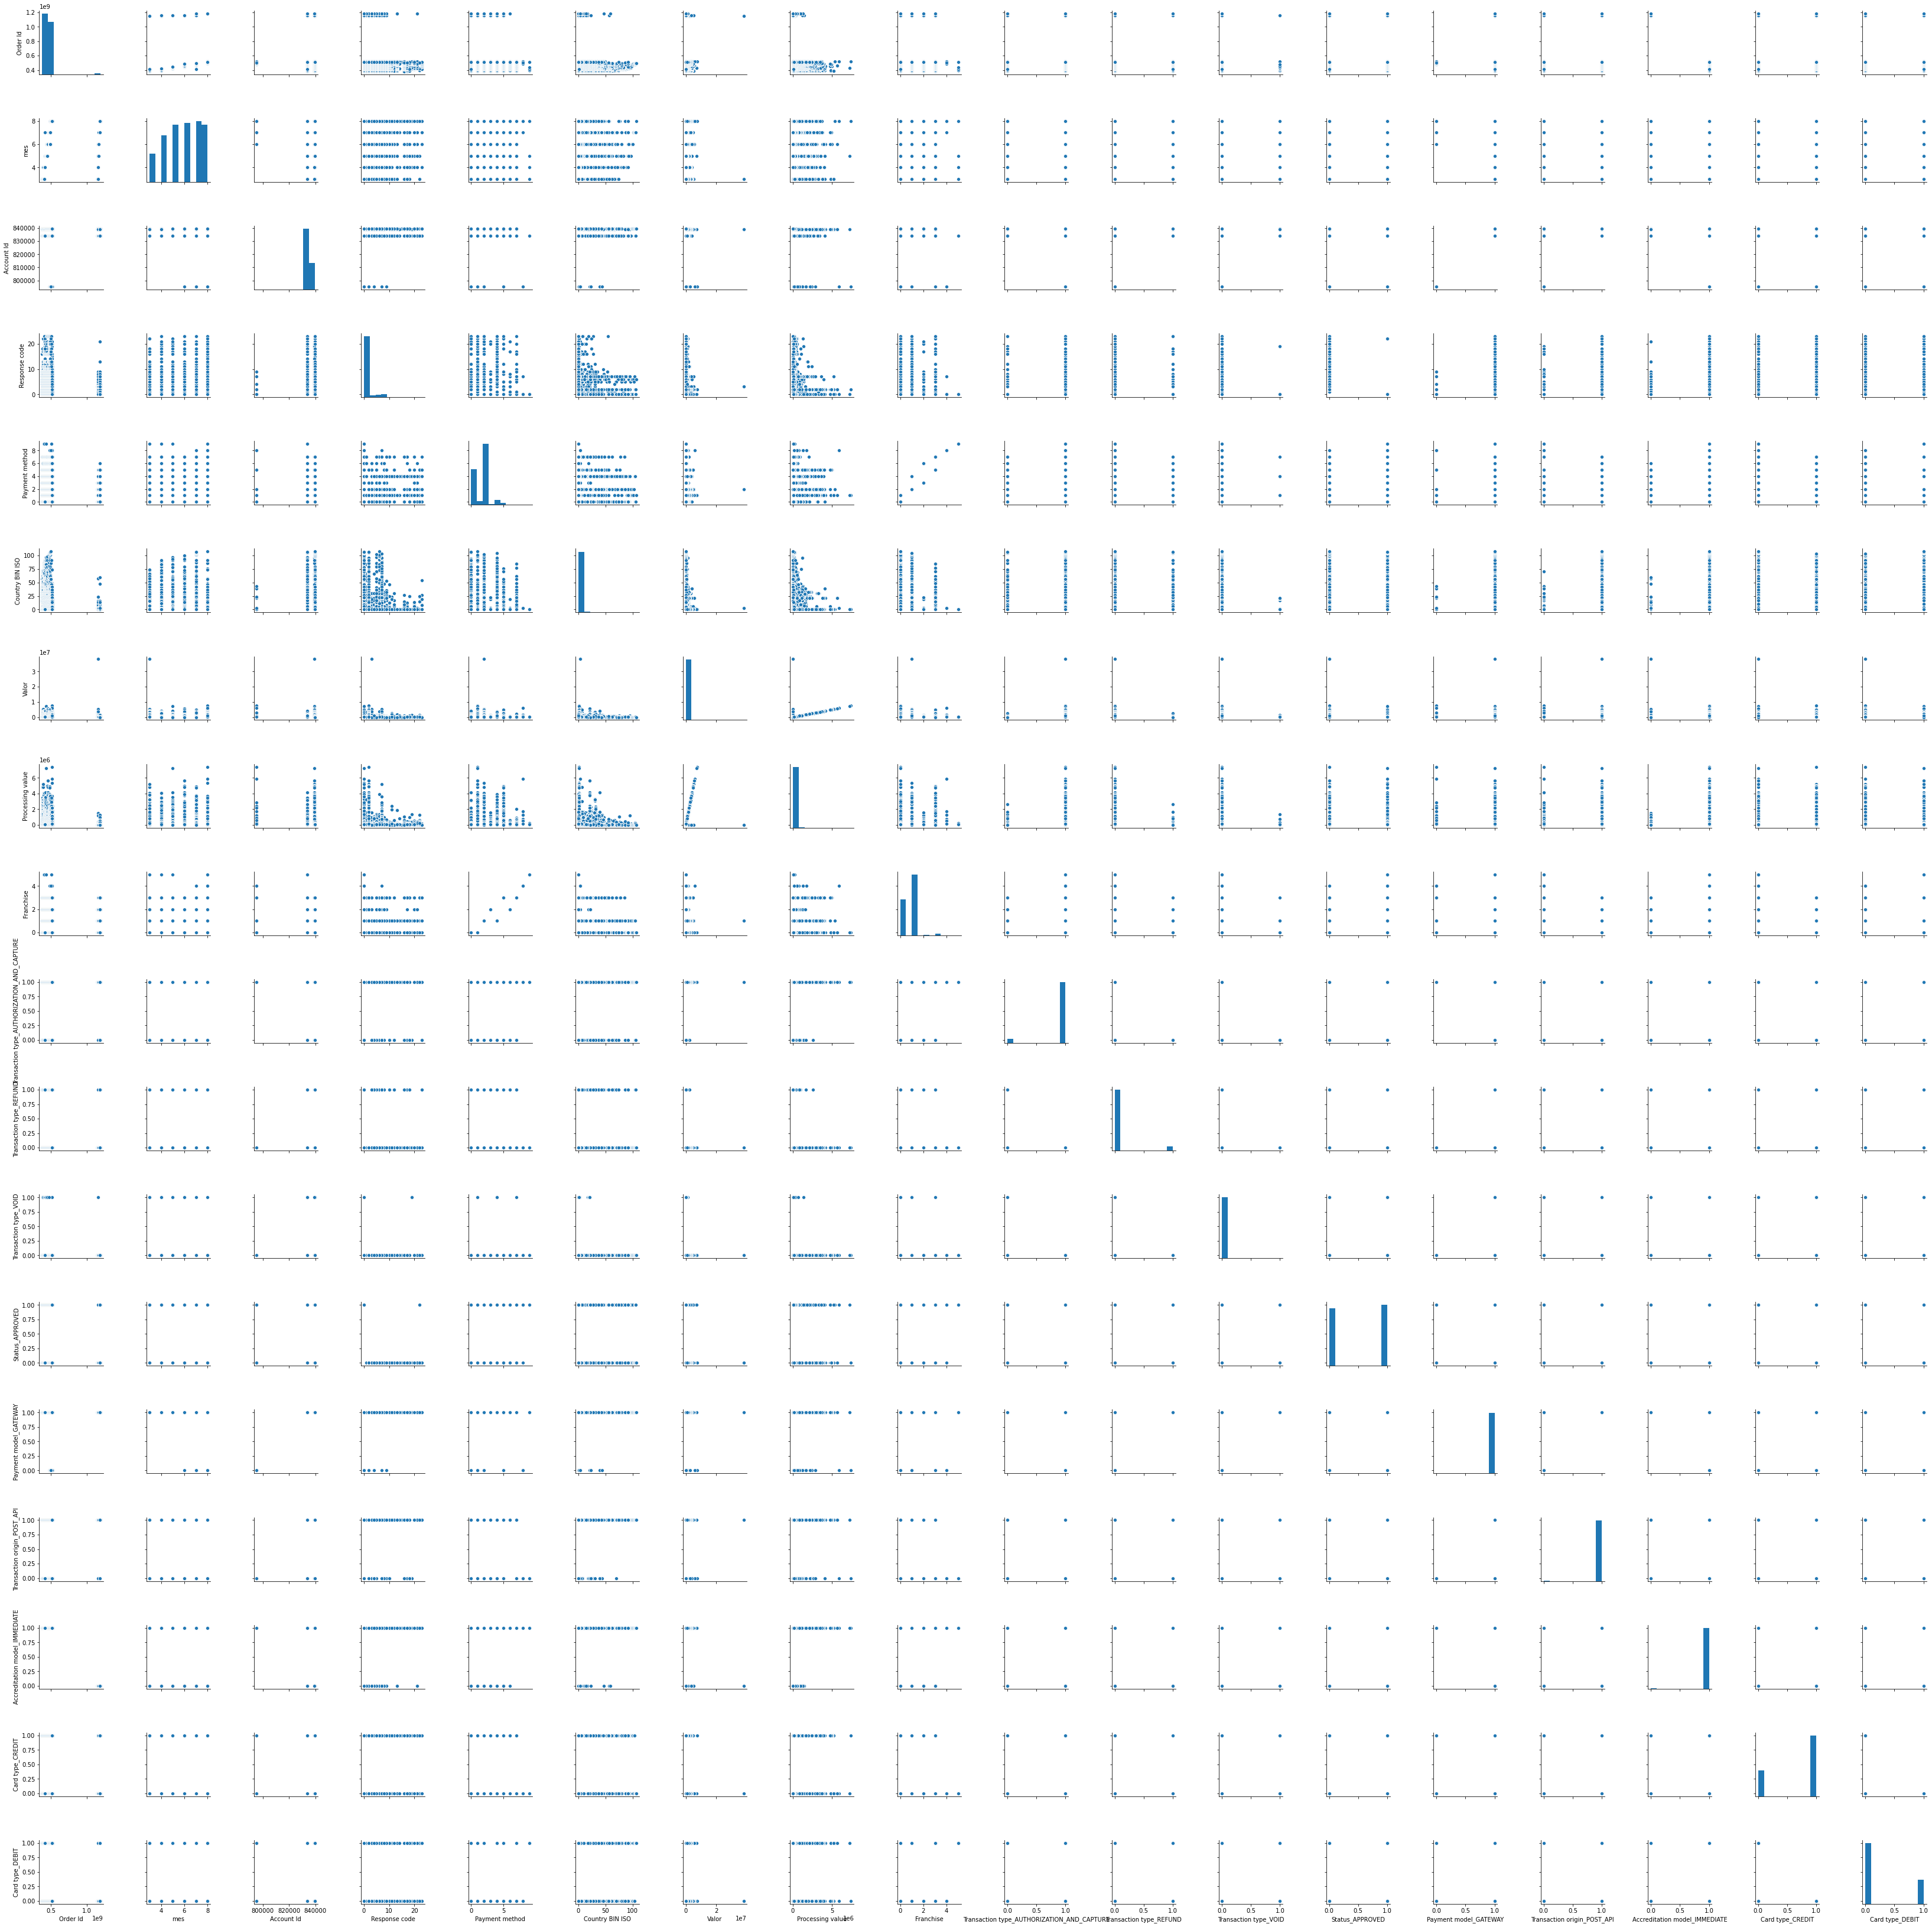

In [26]:
sns.pairplot(daf)

De antemano, una de las variables que cobran gran importancia en este dataset es la variable Status, pues con ella se logra determinar cuál fue el resultado final de cada transacción, así como su relación con la variable Valor debido al significado de esta última.
Analizando los elementos visible de la matriz de correlación Status presenta gran relación con la variable response code, llegando al 71% de relación decresciente, lo cual cobra sentido en razón a la respuesta inmediata que ocurre en la transacción sea positiva o negativa, enviando una señal de alerta sobre el procedimiento.

Así, por ahora se tomará Status como la variable independiente del modelo de ML, empezando por una regresión logística y un caso de regresión lineal con estas 2 variables mencionadas

In [16]:
#Regresión Logística
from sklearn.linear_model import LogisticRegression as LoR
import statsmodels.api as sn
import statsmodels.discrete.discrete_model as sd

In [17]:
x = daml["Status_APPROVED"]
y = daml.loc[:, daml.columns != "Status_APPROVED"]
modelo1 = LoR()
modelo1.fit(y,x)
print("Coef:", modelo1.coef_, "Interceptors:", modelo1.intercept_)

Coef: [[-2.04187918e-09  7.24538245e-12  1.38823665e-06 -2.99261529e-10
  -3.00140870e-11 -1.60846935e-10 -1.01340989e-06 -8.62607251e-07
  -3.66113875e-12 -3.57166625e-12  5.31888567e-12  1.76593339e-14
   1.76273329e-12  1.57039289e-12  2.91666029e-12  4.19018926e-11
  -4.04208917e-11]] Interceptors: [1.76487876e-12]


In [18]:
yconst = sn.add_constant(y)
LRmodelo1 = sd.Logit(x, yconst).fit()
LRmodelo1.summary()

C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: 0.007806
         Iterations: 35


C:\Users\Usuario\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Status_APPROVED   No. Observations:               570015
Model:                          Logit   Df Residuals:                   570003
Method:                           MLE   Df Model:                           11
Date:                Sat, 26 Mar 2022   Pseudo R-squ.:                  0.9887
Time:                        18:21:37   Log-Likelihood:                -4449.6
converged:                      False   LL-Null:                   -3.9487e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         28.7484   6.78e+05   4.24e-05      1.000   -1.33e+06    1.33e+06
Order Id                                     4.21e-09   4.04e-09      1.042      0.297   -3.71e-09    1.21e-08
mes                                           -0.1863      0.098     -1.910      0.056      -0.377       0.005
Account Id                                 -3.375e-05    1.8e-05     -1.874      0.061    -6.9e-05    1.55e-06
Response code                                 -7.5295      0.055   -138.035      0.000      -7.636      -7.423
Payment method                                -2.2228      0.048    -46.412      0.000      -2.317      -2.129
Country BIN ISO                               -0.0034      0.009     -0.374      0.708      -0.021       0.014
Valor                                         -0.0001      0.004     -0.025      0.980      -0.009       0.009
Processing value                               0.0001      0.004      0.025      0.980      -0.009       0.009
Franchise                                      4.9429      0.107     46.171      0.000       4.733       5.153
Transaction type_AUTHORIZATION_AND_CAPTURE     2.8827   6.78e+05   4.25e-06      1.000   -1.33e+06    1.33e+06
Transaction type_REFUND                        7.9008   6.78e+05   1.17e-05      1.000   -1.33e+06    1.33e+06
Transaction type_VOID                         17.9649   6.78e+05   2.65e-05      1.000   -1.33e+06    1.33e+06
Payment model_GATEWAY                          1.7116      4.597      0.372      0.710      -7.298      10.721
Transaction origin_POST_API                   -0.9131      2.091     -0.437      0.662      -5.011       3.185
Accreditation model_IMMEDIATE                  2.8621      3.020      0.948      0.343      -3.056       8.781
Card type_CREDIT                              -1.1086      0.501     -2.213      0.027      -2.090      -0.127
Card type_DEBIT                               -1.1333      0.502     -2.256      0.024      -2.118      -0.149
==============================================================================================================

Possibly complete quasi-separation: A fraction 0.17 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [19]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc

In [20]:
#Regresión Lineal
from sklearn.linear_model import LinearRegression as LR

In [21]:
import statsmodels.api as sn
x = sn.add_constant(daml["Response code"])
model3 = sn.OLS(daml["Status_APPROVED"], x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Status_APPROVED   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                 6.124e+05
Date:                Sat, 26 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:21:37   Log-Likelihood:            -2.0552e+05
No. Observations:              570015   AIC:                         4.111e+05
Df Residuals:                  570013   BIC:                         4.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.7661      0.001   1365.330      0.000       0.765       0.767
Response code    -0.1820      0.000   -782.561      0.000      -0.182      -0.182
==============================================================================
Omnibus:                    70588.386   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           418357.908
Skew:                           0.448   Prob(JB):                         0.00
Kurtosis:                       7.100   Cond. No.                         3.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model3.predict(x)

0         0.766140
1         0.584102
2         0.402064
3         0.766140
4         0.766140
            ...   
570010    0.402064
570011   -0.144051
570012    0.766140
570013    0.402064
570014    0.037987
Length: 570015, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split as tts
x = daml["Response code"]
y = daml.loc[:, daml.columns != "Response code"]
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)
print("xtrain: ", x_train.shape, "xtest:", x_test.shape)


xtrain:  (456012,) xtest: (114003,)


In [24]:
#x_train = np.reshape(-1, 1)
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 2. ... 5. 3. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [25]:
x = daml["Response code"]
y = daml.loc[:, daml.columns != "Response code"]
modelo4 = LoR()
modelo4.fit(y,x)
print("Coef:", modelo4.coef_, "Interceptors:", modelo4.intercept_)

Coef: [[ 1.58746726e-08  1.64087310e-14  1.29683264e-08 -1.14759286e-13
  -6.71257288e-13 -1.02479367e-08 -9.08160596e-09 -1.18634389e-14
  -7.51020442e-15  2.34280702e-14  6.92011167e-17  4.49548583e-13
   1.59996046e-14  1.52366685e-14  2.40745792e-14  1.81981886e-13
  -1.65019588e-13]
 [ 8.02466564e-09 -3.21124998e-16 -5.67633546e-12  2.16263856e-14
  -1.54417799e-14 -1.76934568e-10 -1.76801037e-10 -5.09474961e-15
   1.37444351e-15 -1.36558777e-15 -2.73690708e-18 -1.29086153e-14
   7.17078846e-18  4.38958979e-17 -1.44988996e-17  3.92281427e-16
  -2.43633248e-16]
 [ 1.51635099e-08  5.41266235e-14  2.19213601e-09  1.19746104e-14
   5.64689897e-13  1.46956879e-08  1.52080423e-08  4.05236185e-14
   4.47602108e-14 -4.22896149e-14 -5.91720325e-17 -3.27621545e-13
   2.39783352e-15  3.14571493e-15  4.95937476e-15 -1.54767270e-13
   1.64920363e-13]
 [ 9.59153147e-09 -7.35222995e-14 -1.45256222e-08 -2.37149142e-14
  -1.65238012e-14 -2.47554290e-09 -4.15555704e-09 -9.55337503e-15
  -3.36063494

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
